# WordEmbedding: Tutorial, Visualization and Quality Test

`@hyyoka`



# 0. Brief Reviews




> ***Making computers understand human language***

### 1) 임베딩이란?

> [임베딩] 사람이 쓰는 자연어를 기계가 이해할 수 있도록 숫자의 나열인 “벡터”로 바꾸는 결과와 과정

- FROM "***onehot-encoding***" 

    "안녕 내 이름은 효원이야" 中 "이름은" </br>
$[0,0,0,0] \rightarrow [0,0,1,0]$

    - 단점: 차원 & 의미 표현 

</br>


- TO "***embedding_vector***"
    - ![대체 텍스트](https://i.imgur.com/TLkEBWK.png)

### 2) 워드임베딩의 종류와 특성

워드 임베딩은 "**무슨 정보를 이용해 단어를 표현하느냐**"에 따라 다양한 종류로 나누어진다. 

|종류|정보|설명|
|-|-|-|
|Word2Vec|주변 단어|한 단어의 주변 단어를 통해 그 단어의 의미를 파악 : context=>target인 CBOW 모델 & target=>context인 skip-gram 모델|
|FastText|주변 단어 + n-gram|Word2Vec과 유사한 방식으로 학습하나, 단어를 n-gram으로 나누어 학습하여 subword information을 고려|
| GloVe|주변 단어 + 전체 코퍼스의 분포|한 단어의 의미를 표현하는 데 주변 단어만 고려한다는 한계를 극복하기 위해 전체 코퍼스의 통계 정보를 고려|

### 3) Gensim

자연어를 벡터로 변환하는데 필요한 대부분의 편의기능을 제공하는 라이브러리

[Gensim_description](https://radimrehurek.com/gensim/apiref.html)

</br>

---


In [ ]:
# colab 환경에서 python glove를 사용하기 위해 pip로 install

! pip install glove_python

     |████████████████████████████████| 266kB 5.5MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700276 sha256=5aa0084fa3b1fa6e638499e2abc38fc6535fc58d46a3045fe4b93d38abf933fa
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
# 필요한 라이브러리들 올리기
# 사용할 라이브러리들이 import되어있어야 사용할 수 있습니다. 

import gensim
from gensim.models import Word2Vec, FastText
from glove import Corpus, Glove
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# 사용할 코퍼스의 경로
path = '/content/wiki_small800.txt'

In [ ]:
# 데이터 형태 확인
df = pd.read_csv(path, header=None)
df

,0
0,"실수축 위 에서 감마 함수 의 그래프 수학 에서 , 감마 함수 ( Γ 函數 는 계승..."
1,"아쿠타가와 류노스케 ( , 1 8 9 2 년 3 월 1 일 ~ 1 9 2 7 년 7..."
2,"장국영 ( , , , 1 9 5 6 년 9 월 1 2 일 ~ 2 0 0 3 년 4 ..."
3,"2 0 0 px 통계학 ( 統計 學 은 산술 적 방법 을 기초 로 하 여 , 주로 ..."
4,"컴퓨터 과학 ( ) 은 전산 이론 , 하드웨어 및 소프트웨어 에 중점 을 둔 정보 ..."
...,...
746,"알베르트 아인슈타인 ( , , 1 8 7 9 년 3 월 1 4 일 ~ 1 9 5 5..."
747,Hello World Program . png | 섬네일 | right | 4 0 ...
748,널리 받아들여 지 는 유럽 의 정의 : - 녹색 은 지리 적 유럽 - 진한 파랑 색...
749,"첫째 줄 기독교 , 유대교 , 힌두교 , 바하이교 둘째 줄 이슬람 , 영지주의 , ..."


</br>
</br>

# 1. Word2Vec Tutorial

In [ ]:
# word2vec모델에 올리기 위해서는 txt가 아닌, word2vec모델에 적합한 객체로 바꾸어야합니다. 
# gensim.models.word2vec.Text8Corpus(코퍼스 경로)를 통해 자동으로 객체를 생성합니다. 

corpus = gensim.models.word2vec.Text8Corpus(path)

In [ ]:
print(list(corpus)[0])
print(corpus)

['"실수축', '위', '에서', '감마', '함수', '의', '그래프', '수학', '에서', ',', '감마', '함수', '(', 'Γ', '函數', '는', '계승', '함수', '의', '해석', '적', '연속', '이', '다', '.', '감마', '함수', '의', '기호', '는', '감마', '(', 'Γ', ')', '라는', '그리스', '대문자', '를', '사용', '한다', '.', '양', '의', '정수', 'n', '에', '대하', '여', '이', '성립', '한다', '.', 'gamma', '.', 'jpg', '|', '섬네일', '|', '3', '0', '0', 'px', '|', 'right', '|', '복소평면', '에서', '의', '감마', '함수', '감마', '함수', '는', '다음', '과', '같이', '여러', '가지', '로', '정의', '할', '수', '있', '으며', ',', '이', '들', '은', '모두', '동치', '임', '을', '보일', '수', '있', '다', '.', '감마', '함수', '는', '다음', '과', '같', '은', '적분', '으로', '정의', '된다', '.', '이', '적분', '을', '오일러', '적분', '이', '라고', '한다', '.', '오일러', '적분', '은', '상반', '평면', '인', '영역', '에서', '절대', '수렴', '한다', '.', '여기', '에', '해석', '적', '연속', '을', '사용', '해', '이', '함수', '의', '정의역', '을', '위', '의', '단순', '극', '을', '제외', '한', '전', '복소평면', '으로', '확장', '할', '수', '있', '다', '.', '이', '확장', '된', '함수', '를', '감마', '함수', '라', '부른다', '.', '이', '정의', '는', '오일러', '의', '이름', '을', '따', '오일러'

In [ ]:
# word2vec 모델을 선언합니다. iter: 학습수, min_count: 최소 단어 반복, size=임베딩벡터 차원수, window=앞뒤 단어 개수, sg: skipgram
model = Word2Vec(corpus, min_count=5, size=100, window=2, iter=200, sg=1)

In [ ]:
# 모델을 반복적으로 사용하기 위해서는 "내가 선언한 모델".save(원하는 모델명)을 이용해 저장해야합니다. 
# 파일 아이콘을 누르면 모델이 생성된 것을 확인할 수 있습니다. 
# 해당 모델을 우클릭하여 다운로드 받으시면 됩니다. 

model.save('w2v_model')

</br>


### 저장된 모델 사용해보기

- similarity() : 두 단어의 유사도 계산
- most_similar() : 가장 유사한 단어를 출력
- wv.doesnt_match() : 가장 유사하지 않은 단어 출력

In [ ]:
# 모델을 사용하기 위해서는 모델을 다시 올려줘야합니다. 
# 현재 Word2vec을 사용하고 있으므로 Word2Vec.load(모델이름)을 사용합니다. 

w2v_model = Word2Vec.load('w2v_model')

In [ ]:
w2v_model.similarity('음식', '드라마')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.104803115

In [ ]:
w2v_model.similarity('영화', '드라마')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.3329822

</br>


In [ ]:
# topn=출력 단어 수 

w2v_model.most_similar(positive=["수학"], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('대수학', 0.5833554863929749),
 ('물리', 0.578608512878418),
 ('이론', 0.5664163827896118),
 ('물리학', 0.5569581985473633),
 ('해석학', 0.5504838228225708),
 ('심리학', 0.5483289957046509),
 ('귀납법', 0.5479006767272949),
 ('선형', 0.5396912693977356),
 ('알고리즘', 0.5387821197509766),
 ('언어학', 0.5363491773605347)]

most_similar 메서드는 positive 인수와 negative 인수를 사용하여 다음과 같은 단어 간 관계도 찾을 수 있다.

> she + (actor - actress) = he

In [ ]:
w2v_model.most_similar(positive=['개그맨', '여자'], negative= ['남자'], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('탁구', 0.6514484286308289),
 ('리포터', 0.6086040735244751),
 ('개그우먼', 0.5905206203460693),
 ('티아라', 0.5431771278381348),
 ('교육부', 0.5430202484130859),
 ('보람', 0.5313093662261963),
 ('배드민턴', 0.5267413854598999),
 ('연극배우', 0.5260541439056396),
 ('아나운서', 0.5236783027648926),
 ('매드', 0.5202757120132446)]

</br>

In [ ]:
# input으로는 python list형을 넣어야합니다. 

w2v_model.wv.doesnt_match('한국 일본 베트남'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'일본'

In [ ]:
w2v_model.wv.doesnt_match('남자 여자 주방'.split())

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'남자'

</br>
</br>

# 2. FastText Tutorial


In [ ]:
# 모델 선언, 차원수는 100
model = FastText(size=100, window=2)

In [ ]:
# build the vocabulary
model.build_vocab(corpus_file=path)

In [ ]:
# train the model
model.train(
    corpus_file=path, epochs=200,
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)

In [ ]:
print(model)

FastText(vocab=13355, size=100, alpha=0.025)


In [ ]:
# 모델을 저장합니다. 
model.save('ft_model')

</br>

### 저장한 모델 사용해보기

In [ ]:
# 모델을 로드합니다. 

ft_model = FastText.load('ft_model')

In [ ]:
print("배우" in ft_model.wv.vocab)
# print(ft_model['배우'])

True


In [ ]:
ft_model.similarity('영화', '드라마')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.32369608

In [ ]:
ft_model.most_similar(positive=["영화"], topn=10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('영화상', 0.6759456396102905),
 ('만화', 0.5434242486953735),
 ('채플린', 0.5388962030410767),
 ('작가', 0.5384577512741089),
 ('영화사', 0.5231229066848755),
 ('문학', 0.5041056275367737),
 ('희극인', 0.49091702699661255),
 ('애니메이션', 0.4857531785964966),
 ('문학가', 0.48521167039871216),
 ('만화가', 0.4785199761390686)]

</br>

# 3. GloVe Tutorial

## 1) 파이썬 라이브러리의 GloVe

In [ ]:
# 코퍼스 객체를 선언합니다. 

data = gensim.models.word2vec.Text8Corpus(path)
corpus = Corpus()

# glove 모델에서 사용하기 위해서 모양을 알맞게 바꾸어줍니다. 
corpus.fit(data,window=2)

In [ ]:
# 모델을 선언합니다. 
model = Glove(no_components=5, learning_rate=0.05)

# 모델을 학습합니다. 학습 수는 200입니다. 
model.fit(corpus.matrix, epochs=200, no_threads=4, verbose=False)

In [ ]:
# glove 모델을 사용하기 위해서는 모델에 해당 단어 사전을 올려줘야합니다. 
model.add_dictionary(corpus.dictionary)

In [ ]:
# 모델을 저장합니다. 

model.save('gv_model')

### 저장한 모델 사용해보기

In [ ]:
# 모델을 로드합니다. 

gv_model = Glove.load('gv_model')

In [ ]:
gv_model.most_similar('수학')

[('북반구', 0.9982917742181879),
 ('시스템', 0.9904748992469151),
 ('내각', 0.9895645267535743),
 ('혁신단', 0.987385208948862)]

</br>

## 2) Gensim에서 pre-trained된 GloVe 모델 사용하기

옆의 링크에서 pre-trained된 Glove 모델을 다운받을 수 있다.
[GloVe](https://nlp.stanford.edu/projects/glove//)

glove.6B.100d.txt training data : Wikipedia data with 6 billion tokens and a 400,000 word vocabulary

In [ ]:
# gensim에서는 사전 학습된 glove모델을 마치 word2vec처럼 사용할 수 있게 하는 모듈을 지원합니다. (glove2word2vec)
# 사전 훈련된 임베딩 벡터는 따로 다운로드받아야 합니다. 

from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

# 사전 훈련 벡터
glove_input_file = 'glove.6B.100d.txt'
# word2vec처럼 변환된 모델
word2vec_output_file = 'glove.6B.100d.txt.word2vec'

# glove -> word2vec
glove2word2vec(glove_input_file, word2vec_output_file)

Gensim의 glove2word2vec를 사용하면 glove를 word2vec format으로 변경할 수 있다. 이후 변경된 format을 이용하여 기존 word2vec의 function을 사용할 수 있다.

In [ ]:
# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False,limit=5000)

In [ ]:
# calculate: (king - man) + woman = ?
model.most_similar(positive=['king', 'women'], negative=['man'], topn=1)

In [ ]:
model.similarity('go','run')

</br>

# 4. Visualization

- word2vec을 100차원으로 했기 때문에 시각화를 위해서 저차원으로 축소
- 축소할 때 관계를 유지하기 위해 t-SNE(t-Stochastic Neighbor Embedding)로 transform
- [관련 내용](https://lovit.github.io/nlp/representation/2018/09/28/tsne/)

## 1) tsne 2차원 축소

In [ ]:
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib as mpl

In [ ]:
# 시각화에서 한글이 깨지기 때문에 따로 폰트를 올려주어야합니다. 
path_nanum = "/content/NanumBarunpenB.otf"
prop = fm.FontProperties(fname=path_nanum)

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False 

In [ ]:
# 간단한 전처리

FILTERS = "([~,!?\"':.;|~)^(])"
CHANGE_FILTER = re.compile(FILTERS)

EXP = "[1234567890\-]"
CHANGE_EXP = re.compile(EXP)

ENG = "[a-zA-Z]"
CHANGE_ENG = re.compile(ENG)

words = []
for line in df[0]:
    line = CHANGE_FILTER.sub("", line)
    line = CHANGE_EXP.sub("", line)
    line = CHANGE_ENG.sub("", line)
    token = word_tokenize(line)
    words+=token

In [ ]:
# word2vec에 대한 시각화를 진행할 것으므로, model에 원하는 word2vec 모델을 올려줍니다. 
model = Word2Vec.load('w2v_model')

# 가장 빈도수가 높은 800개의 단어를 추출합니다. 
freq_list = Counter(words).most_common(800)
vocab = [i[0] for i in freq_list if len(i[0])>1]

# 해당 단어들에 해당하는 임베딩 벡터
X = model[vocab]

# 2차원으로 축소합니다. 
tsne = TSNE(perplexity=30,n_components=2, init='pca', n_iter=3500, random_state=12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
def tsne_2d(title, tsne):
    # 100 => 2차원
    X_tsne = tsne.fit_transform(X[:300,:])
    df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
    
    %matplotlib inline
    fig = plt.figure()
    fig.set_size_inches(20, 10)
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(df["x"], df["y"])
    for word, pos in list(df.iterrows()):
        ax.annotate(word, pos, fontsize=12, fontproperties=prop)
    plt.title(title)
    plt.show()

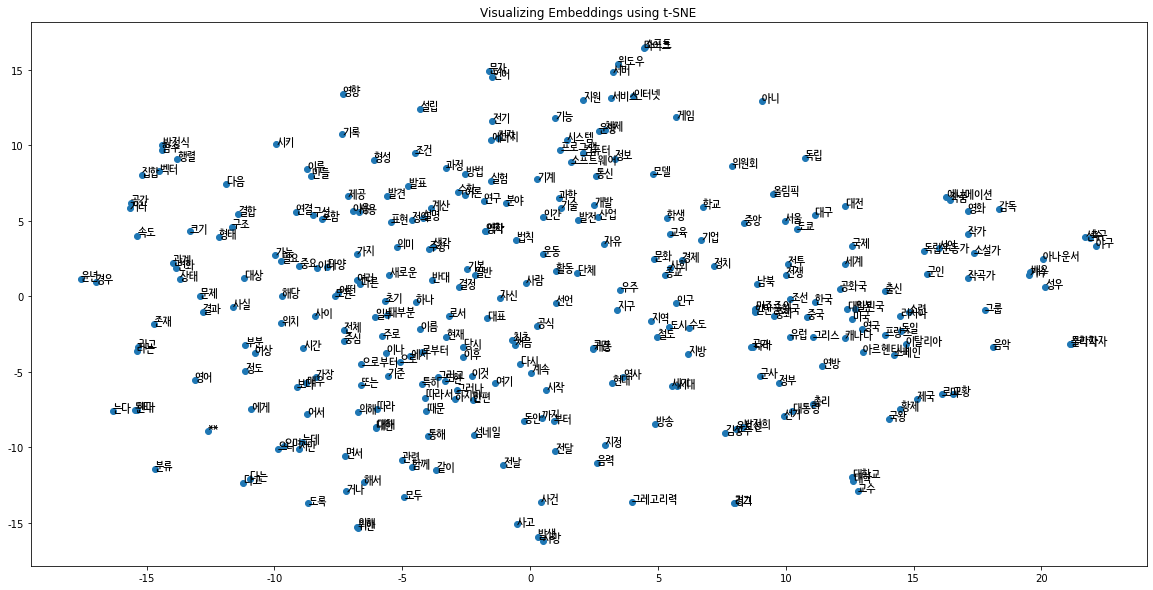

In [ ]:
tsne_2d('Visualizing Embeddings using t-SNE', tsne)

## 2) tsen 3차원 축소

In [ ]:
# [참고] https://habr.com/en/company/mailru/blog/449984/

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# 3차원으로 tsne
tsne_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)

# 100=>3
embeddings = tsne_3d.fit_transform(X)

def tsne_3d(title, label, embeddings, a=1):
    %matplotlib inline
    fig = plt.figure()
    ax = Axes3D(fig)
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    z = embeddings[:, 2]
    plt.scatter(x, y, z, c='crimson', alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


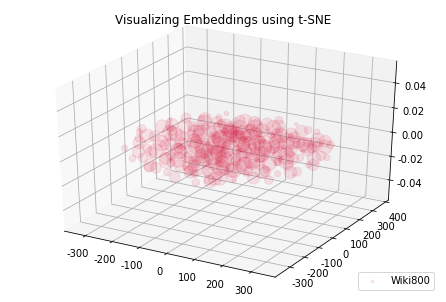

In [ ]:
tsne_3d('Visualizing Embeddings using t-SNE', 'Wiki800', embeddings, a=0.1)

- 보다 심화된 시각화가 필요하다면 [다음의 링크](https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5)를 참고하세요!


# 5. Word_Embedding Test

이 장에서 소개하는 평가 방식들은 **어떤 단어 임베딩을 사용할 것인가**를 판단하는 지표가 된다. 

대표적으로는 다음의 두가지가 있다:
1.  단어 유사도 평가 (Word similarity test)
2.  단어 유추 평가 (Word analogy test)

위의 항목들은 자연어 단어 간 통사적, 의미론적 관계가 임베딩에 얼마나 잘 녹아있는가 정량적으로 평가한다. 

데이터와 코드는  [이동준님의 github](https://github.com/dongjun-Lee/kor2vec)을 참고하였다. 코드는 우리의 환경에 맞게 수정되었다. 


## 1) 단어 유사도 평가

상관 계수: [spearman & pearson](https://support.minitab.com/ko-kr/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/)

 

In [ ]:
def word_sim_test(test_fname, model):
        actual_sim_list, pred_sim_list = [], []
        missed = 0
        with open(test_fname, 'r') as pairs:
            for pair in pairs:
                w1, w2, actual_sim = pair.strip().split(",")
                try:
                    pred_sim = model.similarity(w1, w2)
                    actual_sim_list.append(float(actual_sim))
                    pred_sim_list.append(pred_sim)
                except KeyError:
                    missed += 1
                    
        spearman, _ = st.spearmanr(actual_sim_list, pred_sim_list)
        pearson, _ = st.pearsonr(actual_sim_list, pred_sim_list)
        return spearman, pearson, missed

In [ ]:
test_fname = "/content/kor_ws353.csv"

In [ ]:
df = pd.DataFrame({"Word Embedding": ["Word2Vec","Word2Vec","FastText","FastText"]})
df["Criterion"] = ["spearman", "pearson"]*2
df["score"] = list(word_sim_test(test_fname, w2v_model))[:-1] + list(word_sim_test(test_fname, ft_model))[:-1]
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


,Word Embedding,Criterion,score
0,Word2Vec,spearman,0.435339
1,Word2Vec,pearson,0.458454
2,FastText,spearman,0.361190
3,FastText,pearson,0.428583


Text(0.5, 1.0, 'Word Similarity Test Result')

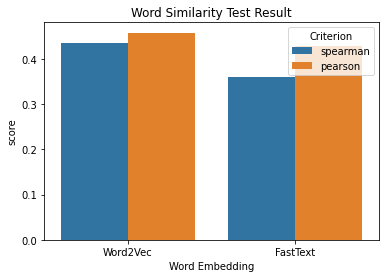

In [ ]:
sns.barplot(x="Word Embedding", y="score", hue="Criterion", data=df)
plt.title("Word Similarity Test Result")

## 2) 단어 유추 평가

In [ ]:
def word_analogy_test(test_fname, model):
        correct, total, missed = 0, 0, 0

        with open(test_fname, 'r', encoding='utf-8') as f:
            for line in f:
                if line.startswith("#") or len(line) <= 1: continue
                words = line.strip().split(" ")

                try:
                    predicted_answer = [i[0] for i in model.most_similar(positive=[words[0], words[2]], negative= [words[1]], topn=30)]
                    # print(words[0] + " - " + words[1] + " + " + words[2])
                    # print("correct answer:", words[3])
                    # print("predicted answers:", predicted_answer[0])
                    # print("")
                    if words[-1] in predicted_answer: correct += 1
                except:
                    missed += 1
                
                total += 1
        print(model)
        print("# of correct answer:", correct, ", # of data:", total, ", # of errors:", missed)
        print()
        return correct/(total-missed)

In [ ]:
test_fname = "/content/kor_analogy_semantic.txt"

In [ ]:
df2 = pd.DataFrame({"Word Embedding": ["Word2Vec","FastText"]})
df2["score"] = [word_analogy_test(test_fname, w2v_model), word_analogy_test(test_fname, ft_model)]
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


Word2Vec(vocab=13355, size=100, alpha=0.025)
# of correct answer: 42 , # of data: 420 , # of errors: 78

FastText(vocab=13355, size=100, alpha=0.025)
# of correct answer: 51 , # of data: 420 , # of errors: 78



,Word Embedding,score
0,Word2Vec,0.122807
1,FastText,0.149123


Text(0.5, 1.0, 'Word Analogy Test Result')

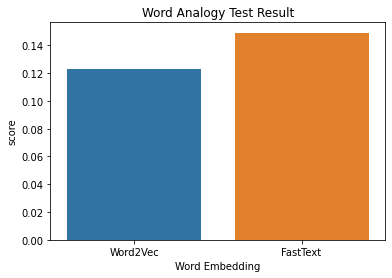

In [ ]:
sns.barplot(x="Word Embedding", y="score", data=df2)
plt.title("Word Analogy Test Result")

</br>

# 구체적 연구 사례

정유남․왕규현․송상헌 (2020) 딥러닝을 이용한 노동신문의 이념적 어휘 연구. 한국어학 제88권. 213-245.

https://bit.ly/3eNYlbc